In [5]:
import sys
import os
import numpy as np
import multiprocessing
import dill
import matplotlib.pyplot as plt
import pandas as pd

module_path = os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path + "/../src/simulations_v2")
    sys.path.append(module_path + "/..")
from load_params import load_params

from multi_group_simulation import MultiGroupSimulation

In [6]:
from util_functions import *
from uncertainty_analysis import *
from sim_helper_functions import *

In [13]:
lhs_output_sim_files = []
for i in range(2000):
    fname = '/home/jmc678/covid_data/group-testing/notebooks/apr_29_scenarios/point_{}.dill'.format(i)
    lhs_output_sim_files.append(fname)


In [14]:
scenario_data = load_sim_output(lhs_output_sim_files)
res_results = residential_regression(scenario_data)
res_pessimistic = calculate_pessimistic_scenario(res_results)

# Res Pessimistic Instruction Sensitivity Graph

In [15]:
pess_sens_sim_files = []
for i in np.linspace(-1.1, 1.1, 23):
    fname = '/home/jmc678/covid_data/group-testing/notebooks/pnas_paper_figs/pess_sensitivity/pess_sensitivity_sims_1620618074/mult_{}.dill'.format(i)
    pess_sens_sim_files.append(fname)

In [16]:
pess_sensitivity_data = load_sim_output(pess_sens_sim_files)
pess_sensitivity_data['mult'] = np.linspace(-1.1, 1.1, 23)
pess_sensitivity_data

,asymp_prob_mult,inital_prev_mult,R0,outside_inf_mult,daily_self_report_prob,ct_mult,ct_testing_ratio,test_sensitivity,test_noncompliance,E_time,...,res_ithaca_inf_10,res_ithaca_inf_50,res_ithaca_inf_90,vir_cornell_inf_10,vir_cornell_inf_50,vir_cornell_inf_90,vir_ithaca_inf_10,vir_ithaca_inf_50,vir_ithaca_inf_90,mult
0,0.832569,0.943485,1.371827,0.973448,0.374966,1.702144,1.175023,0.686856,0.094314,2.024084,...,133.9,148.0,159.1,90.7,119.5,146.2,151.0,169.0,181.0,-1.1
1,0.847790,0.948623,1.474388,0.975862,0.373606,1.683768,1.159112,0.678960,0.094831,2.021894,...,130.9,148.5,162.1,100.0,128.5,192.2,150.8,170.0,186.3,-1.0
2,0.863011,0.953761,1.576950,0.978275,0.372245,1.665391,1.143201,0.671064,0.095348,2.019705,...,140.8,157.5,171.1,118.6,149.0,185.2,163.9,176.5,195.0,-0.9
3,0.878232,0.958898,1.679511,0.980689,0.370885,1.647014,1.127289,0.663168,0.095865,2.017515,...,138.8,153.5,171.4,132.8,161.0,234.1,162.8,185.0,205.1,-0.8
4,0.893453,0.964036,1.782072,0.983103,0.369524,1.628637,1.111378,0.655272,0.096382,2.015326,...,140.0,160.5,180.0,127.9,195.0,261.6,168.9,191.0,211.3,-0.7
5,0.908674,0.969174,1.884633,0.985517,0.368164,1.610261,1.095467,0.647376,0.096898,2.013136,...,145.7,163.5,183.0,161.0,231.0,333.2,175.9,203.0,230.1,-0.6
6,0.923895,0.974312,1.987194,0.987931,0.366803,1.591884,1.079556,0.639480,0.097415,2.010947,...,150.9,165.0,177.3,175.9,244.5,409.2,190.9,206.5,246.3,-0.5
7,0.939116,0.979449,2.089755,0.990345,0.365442,1.573507,1.063645,0.631584,0.097932,2.008758,...,153.9,173.0,186.4,223.2,350.0,512.1,205.7,227.5,263.1,-0.4
8,0.954337,0.984587,2.192317,0.992758,0.364082,1.555130,1.047734,0.623688,0.098449,2.006568,...,159.0,174.5,195.1,260.0,434.5,790.8,204.1,250.0,311.9,-0.3
9,0.969558,0.989725,2.294878,0.995172,0.362721,1.536754,1.031822,0.615792,0.098966,2.004379,...,162.9,180.0,209.0,322.1,710.5,1204.8,239.7,298.5,357.3,-0.2


/home/jmc678/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/jmc678/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/jmc678/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


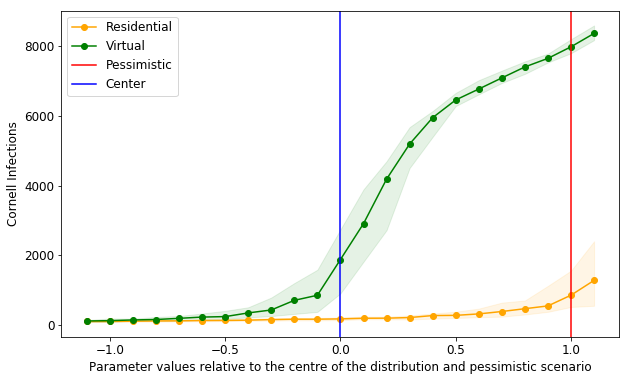

In [17]:
plt.figure(figsize=(10,6))

plt.plot('mult', 'res_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Residential', color='orange')
plt.fill_between(x='mult', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='orange')

plt.plot('mult', 'vir_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Virtual', color='green')
plt.fill_between(x='mult', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='green')

# plt.plot('mult', 'vir-res_cornell_inf_50', marker='o', data=res_vir_pess, label='_nolegend_')
# plt.fill_between(x='mult', y1='vir-res_cornell_inf_10', y2='vir-res_cornell_inf_90', alpha=0.1, data=res_vir_pess)

# plt.title('Cornell Infections')
plt.ylabel('Cornell Infections')
plt.xlabel('Parameter values relative to the centre of the distribution and pessimistic scenario')

plt.axvline(1, label='Pessimistic', color='red')
plt.axvline(0, label='Center', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')

plt.legend()

plt.show()

In [18]:
pess_sens_sim_files = []
for i in np.linspace(-1.1, 1.1, 23):
    fname = '/home/jmc678/covid_data/group-testing/notebooks/pnas_paper_figs/pess_sensitivity_sims_1621286342/pess_sensitivity/mult_{}.dill'.format(i)
    pess_sens_sim_files.append(fname)

In [19]:
pess_sensitivity_data = load_sim_output(pess_sens_sim_files)
pess_sensitivity_data['mult'] = np.linspace(-1.1, 1.1, 23)
pess_sensitivity_data

,asymp_prob_mult,inital_prev_mult,R0,outside_inf_mult,daily_self_report_prob,ct_mult,ct_testing_ratio,test_sensitivity,test_noncompliance,E_time,...,res_ithaca_inf_10,res_ithaca_inf_50,res_ithaca_inf_90,vir_cornell_inf_10,vir_cornell_inf_50,vir_cornell_inf_90,vir_ithaca_inf_10,vir_ithaca_inf_50,vir_ithaca_inf_90,mult
0,0.832569,0.943485,1.371827,0.973448,0.374966,1.702144,1.175023,0.686856,0.094314,2.024084,...,130.9,144.0,162.1,96.9,116.0,142.3,142.8,164.0,181.1,-1.1
1,0.847790,0.948623,1.474388,0.975862,0.373606,1.683768,1.159112,0.678960,0.094831,2.021894,...,132.7,151.5,162.3,104.0,133.0,165.0,154.9,170.0,189.5,-1.0
2,0.863011,0.953761,1.576950,0.978275,0.372245,1.665391,1.143201,0.671064,0.095348,2.019705,...,135.0,154.5,176.1,118.8,149.5,183.9,160.7,175.0,195.1,-0.9
3,0.878232,0.958898,1.679511,0.980689,0.370885,1.647014,1.127289,0.663168,0.095865,2.017515,...,140.0,156.5,175.0,125.2,163.5,213.0,167.0,181.0,197.1,-0.8
4,0.893453,0.964036,1.782072,0.983103,0.369524,1.628637,1.111378,0.655272,0.096382,2.015326,...,144.8,158.5,174.0,143.8,171.0,235.0,171.8,187.5,216.0,-0.7
5,0.908674,0.969174,1.884633,0.985517,0.368164,1.610261,1.095467,0.647376,0.096898,2.013136,...,142.8,162.0,179.2,145.0,214.5,318.5,185.7,204.5,227.4,-0.6
6,0.923895,0.974312,1.987194,0.987931,0.366803,1.591884,1.079556,0.639480,0.097415,2.010947,...,153.8,168.0,191.1,172.9,260.5,415.3,179.9,214.0,241.0,-0.5
7,0.939116,0.979449,2.089755,0.990345,0.365442,1.573507,1.063645,0.631584,0.097932,2.008758,...,150.9,173.0,193.2,189.9,312.5,504.5,191.5,221.0,250.0,-0.4
8,0.954337,0.984587,2.192317,0.992758,0.364082,1.555130,1.047734,0.623688,0.098449,2.006568,...,162.9,180.0,194.1,219.3,423.5,762.7,211.1,250.0,302.4,-0.3
9,0.969558,0.989725,2.294878,0.995172,0.362721,1.536754,1.031822,0.615792,0.098966,2.004379,...,164.8,184.5,204.1,336.2,636.5,1071.4,227.9,289.5,404.0,-0.2


/home/jmc678/anaconda3/lib/python3.6/site-packages/matplotlib/cbook/__init__.py:2020: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x[:, None]
/home/jmc678/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:249: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  x = x[:, np.newaxis]
/home/jmc678/anaconda3/lib/python3.6/site-packages/matplotlib/axes/_base.py:251: FutureWarning: Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.
  y = y[:, np.newaxis]


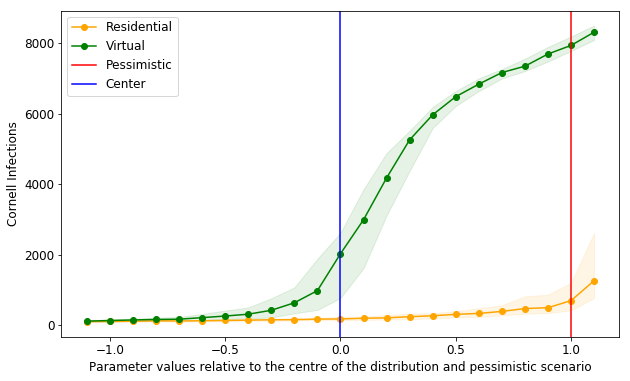

In [20]:
plt.figure(figsize=(10,6))

plt.plot('mult', 'res_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Residential', color='orange')
plt.fill_between(x='mult', y1='res_cornell_inf_10', y2='res_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='orange')

plt.plot('mult', 'vir_cornell_inf_50', marker='o', data=pess_sensitivity_data, label='Virtual', color='green')
plt.fill_between(x='mult', y1='vir_cornell_inf_10', y2='vir_cornell_inf_90', alpha=0.1, data=pess_sensitivity_data, color='green')

# plt.plot('mult', 'vir-res_cornell_inf_50', marker='o', data=res_vir_pess, label='_nolegend_')
# plt.fill_between(x='mult', y1='vir-res_cornell_inf_10', y2='vir-res_cornell_inf_90', alpha=0.1, data=res_vir_pess)

# plt.title('Cornell Infections')
plt.ylabel('Cornell Infections')
plt.xlabel('Parameter values relative to the centre of the distribution and pessimistic scenario')

plt.axvline(1, label='Pessimistic', color='red')
plt.axvline(0, label='Center', color='blue')

# plt.axhline(get_stats(nom_vir_inf_matrix)[0][1] - get_stats(nom_res_inf_matrix)[0][1], label='Nominal Estimate', color='purple')

plt.legend()

plt.show()

In [ ]:
# need res_pessimistic point in LHS space
# find direction, generate all LHS points
# use this function: run_parallel_sims_lhs_space

In [ ]:
def get_direction(pess, centre):
    direction = dict()
    for param in centre.keys():
        direction[param] = pess[param] - centre[param]

def generate_new_params(centre, direction, mult):
    new_params = dict()
    for param in centre.keys():
        new_params[param] = centre[param] + mult * direction[param]

In [5]:
res_pessimistic

{'ct_testing_ratio': 0.8408882933907234,
 'Sy_time': 11.99746235017504,
 'E_time': 1.9781058849148883,
 'ct_mult': 1.3162323939656828,
 'test_sensitivity': 0.5210403803934799,
 'outside_inf_mult': 1.0241384070908395,
 'test_noncompliance': 0.10516921933568771,
 'ID_time': 3.1001602001643,
 'R0': 3.525611538430936,
 'asymp_prob_mult': 1.1522097816900696,
 'inital_prev_mult': 1.0513769799456973,
 'daily_self_report_prob': 0.34639409513141284,
 'virtual_noncompliance': 0.5,
 'intermittent_non-compliance': 0.5,
 'virtual_r0_mult': 0.97,
 'virtual_pop_size': 0.5}

In [7]:
centre = get_centre_point()
centre

{'asymp_prob_mult': 1.0,
 'inital_prev_mult': 1.0,
 'R0': 2.5,
 'outside_inf_mult': 1.0,
 'daily_self_report_prob': 0.36,
 'ct_mult': 1.5,
 'ct_testing_ratio': 1.0,
 'test_sensitivity': 0.6000000000000001,
 'test_noncompliance': 0.1,
 'E_time': 2.0,
 'ID_time': 3.0,
 'Sy_time': 12.0,
 'virtual_noncompliance': 0.5,
 'intermittent_non-compliance': 0.5,
 'virtual_r0_mult': 1.2349999999999999,
 'virtual_pop_size': 0.5}

#### Old Residential Pessimistic

In [21]:
lhs_output_sim_files_old = []
for i in range(2000):
    fname = '/home/aaj54/group-testing/notebooks/apr_24_scenarios/point_{}.dill'.format(i)
    lhs_output_sim_files_old.append(fname)

scenario_data_old = load_lhs_output(lhs_output_sim_files_old)
res_results_old = residential_regression(scenario_data_old)
res_pessimistic_old = calculate_pessimistic_scenario(res_results_old)

In [19]:
def normalize_param(param_name, value):
    lower_bound = PARAM_BOUNDS[param_name][0]
    upper_bound = PARAM_BOUNDS[param_name][1]
    return (value - lower_bound) / (upper_bound - lower_bound)

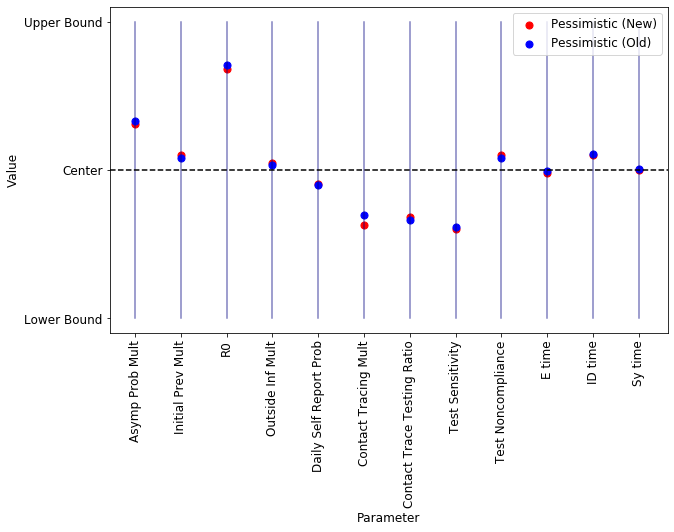

In [22]:
plt.figure(figsize=(10,6))
label = True

for index, param in enumerate(UNCERTAINTY_PARAMS_LIST[:12]):
    plt.plot([index, index], [0,1], color='navy', alpha=0.5)
    if label == True:
        plt.scatter(index, normalize_param(param, res_pessimistic[param]), color='red', label='Pessimistic (New)', s=50)
        plt.scatter(index, normalize_param(param, res_pessimistic_old[param]), color='blue', label='Pessimistic (Old)', s=50)
        label = False
    else:
        plt.scatter(index, normalize_param(param, res_pessimistic[param]), color='red', s=50)
        plt.scatter(index, normalize_param(param, res_pessimistic_old[param]), color='blue', s=50)

plt.axhline(0.5, color='black', ls='--')

plt.xticks(list(range(len(UNCERTAINTY_PARAMS_LIST[:12]))), ['Asymp Prob Mult', 'Initial Prev Mult', 'R0', 'Outside Inf Mult',
                                          'Daily Self Report Prob', 'Contact Tracing Mult', 'Contact Trace Testing Ratio',
                                          'Test Sensitivity', 'Test Noncompliance', 'E time', 'ID time', 'Sy time'])
plt.xticks(rotation = 90)
plt.yticks([0,0.5,1], ['Lower Bound', 'Center', 'Upper Bound'])

plt.xlabel('Parameter')
plt.ylabel('Value')

plt.legend(loc='upper right')
plt.show()